DESCRIPTION

Project Objective:

Build a CNN model that classifies the given pet images correctly into
dog and cat images. You are provided with a collection of images of
pets, that is, cats and dogs. These images are of different sizes with
varied lighting conditions and they should be used as inputs for your
model. You are expected to write the code for CNN image classification
model using TensorFlow that trains on the data and calculates the
accuracy score on the test data.

Project Guidelines:

Begin by creating the ipynb file in the same parent folder where the
downloaded data set is kept. The CNN model should have the following
layers:

1.  Input layer
2.  Convolutional layer 1 with 32 filters of kernel size\[5,5\]
3.  Pooling layer 1 with pool size\[2,2\] and stride 2
4.  Convolutional layer 2 with 64 filters of kernel size\[5,5\]
5.  Pooling layer 2 with pool size\[2,2\] and stride 2
6.  Dense layer whose output size is fixed in the hyper parameter:
    fc\_size=32
7.  Dropout layer with dropout probability 0.4
8.  Predict the class by doing a softmax on the output of the dropout
    layers. This should be followed by training and evaluation:
9.  For the training step, define the loss function and minimize it
10. For the evaluation step, calculate the accuracy Run the program for
    100, 200, and 300 iterations, respectively. Follow this by a report
    on the final accuracy and loss on the evaluation data.

In \[1\]:

    #Lets start by importing libraries

    import pandas as pd
    import numpy as np
    import matplotlib.pyplot as plt
    import tensorflow as tf
    import warnings
    warnings.filterwarnings("ignore")

Now the data is in the form of images in their respective folders. Let
us convert them into arrays of pixel data using data generator.

In \[2\]:

    from keras.preprocessing.image import ImageDataGenerator
    test_datagen = ImageDataGenerator(rescale = 1./255)
    train_datagen = ImageDataGenerator(rescale = 1./255,shear_range = 0.2,zoom_range = 0.2,horizontal_flip = True)

    train_it = train_datagen.flow_from_directory('train/',class_mode='binary',target_size=(200,200),batch_size=40)
    test_it = test_datagen.flow_from_directory('test/',class_mode='binary',target_size=(200,200),batch_size=20)

    Using TensorFlow backend.

    Found 40 images belonging to 2 classes.
    Found 20 images belonging to 2 classes.

Since the training data size is less, we will not use validation set.
Now let us define the model using the specifications given.

We have defined the loss to be Cross Entropy, and set a lower learning
rate to prevnt over shooting.

In \[3\]:

    def define_model():
        model = tf.keras.Sequential()
        model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=5, padding='same', activation='relu',input_shape=(200,200,3))) 
        model.add(tf.keras.layers.MaxPooling2D(pool_size=2,strides=2))

        model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=5, padding='same', activation='relu')) 
        model.add(tf.keras.layers.MaxPooling2D(pool_size=2,strides=2))

        model.add(tf.keras.layers.Flatten())
        model.add(tf.keras.layers.Dense(32, activation='relu'))
        model.add(tf.keras.layers.Dropout(0.4))
        model.add(tf.keras.layers.Dense(2, activation='softmax'))
        
        optimizer = tf.keras.optimizers.Adam(lr=0.001)
        model.compile(loss= 'categorical_crossentropy',metrics=['accuracy'],optimizer=optimizer)
        return model

In \[4\]:

    model1 = define_model()

    # Take a look at the model summary
    model1.summary()

    Model: "sequential"
    _________________________________________________________________
    Layer (type)                 Output Shape              Param #   
    =================================================================
    conv2d (Conv2D)              (None, 200, 200, 32)      2432      
    _________________________________________________________________
    max_pooling2d (MaxPooling2D) (None, 100, 100, 32)      0         
    _________________________________________________________________
    conv2d_1 (Conv2D)            (None, 100, 100, 64)      51264     
    _________________________________________________________________
    max_pooling2d_1 (MaxPooling2 (None, 50, 50, 64)        0         
    _________________________________________________________________
    flatten (Flatten)            (None, 160000)            0         
    _________________________________________________________________
    dense (Dense)                (None, 32)                5120032   
    _________________________________________________________________
    dropout (Dropout)            (None, 32)                0         
    _________________________________________________________________
    dense_1 (Dense)              (None, 2)                 66        
    =================================================================
    Total params: 5,173,794
    Trainable params: 5,173,794
    Non-trainable params: 0
    _________________________________________________________________

Let us train the first model for 100 iterations.

In \[5\]:

    history1 = model1.fit(train_it,epochs=100, verbose=1,steps_per_epoch=1) 

    WARNING:tensorflow:sample_weight modes were coerced from
      ...
        to  
      ['...']
    Train for 1 steps
    Epoch 1/100
    1/1 [==============================] - 2s 2s/step - loss: 0.6968 - accuracy: 0.5000
    Epoch 2/100
    1/1 [==============================] - 2s 2s/step - loss: 2.2532 - accuracy: 0.8250
    Epoch 3/100
    1/1 [==============================] - 2s 2s/step - loss: 2.4079 - accuracy: 0.0500
    Epoch 4/100
    1/1 [==============================] - 2s 2s/step - loss: 1.1295 - accuracy: 0.0500
    Epoch 5/100
    1/1 [==============================] - 2s 2s/step - loss: 0.7120 - accuracy: 0.4500
    Epoch 6/100
    1/1 [==============================] - 2s 2s/step - loss: 0.7189 - accuracy: 0.9750
    Epoch 7/100
    1/1 [==============================] - 2s 2s/step - loss: 0.7071 - accuracy: 1.0000
    Epoch 8/100
    1/1 [==============================] - 2s 2s/step - loss: 0.6992 - accuracy: 0.8750
    Epoch 9/100
    1/1 [==============================] - 2s 2s/step - loss: 0.6955 - accuracy: 0.4250
    Epoch 10/100
    1/1 [==============================] - 2s 2s/step - loss: 0.7201 - accuracy: 0.1000
    Epoch 11/100
    1/1 [==============================] - 2s 2s/step - loss: 0.7077 - accuracy: 0.2750
    Epoch 12/100
    1/1 [==============================] - 2s 2s/step - loss: 0.7109 - accuracy: 0.4500
    Epoch 13/100
    1/1 [==============================] - 2s 2s/step - loss: 0.7084 - accuracy: 0.6000
    Epoch 14/100
    1/1 [==============================] - 2s 2s/step - loss: 0.7216 - accuracy: 0.8000
    Epoch 15/100
    1/1 [==============================] - 2s 2s/step - loss: 0.7351 - accuracy: 0.5000
    Epoch 16/100
    1/1 [==============================] - 2s 2s/step - loss: 0.7813 - accuracy: 0.1250
    Epoch 17/100
    1/1 [==============================] - 2s 2s/step - loss: 0.7103 - accuracy: 0.7500
    Epoch 18/100
    1/1 [==============================] - 2s 2s/step - loss: 0.7458 - accuracy: 0.7000
    Epoch 19/100
    1/1 [==============================] - 2s 2s/step - loss: 0.7554 - accuracy: 0.6250
    Epoch 20/100
    1/1 [==============================] - 2s 2s/step - loss: 0.7986 - accuracy: 0.6750
    Epoch 21/100
    1/1 [==============================] - 2s 2s/step - loss: 1.0281 - accuracy: 0.2250
    Epoch 22/100
    1/1 [==============================] - 2s 2s/step - loss: 0.8828 - accuracy: 0.3500
    Epoch 23/100
    1/1 [==============================] - 2s 2s/step - loss: 1.4123 - accuracy: 0.9500
    Epoch 24/100
    1/1 [==============================] - 2s 2s/step - loss: 1.0270 - accuracy: 0.4750
    Epoch 25/100
    1/1 [==============================] - 2s 2s/step - loss: 1.0415 - accuracy: 0.3250
    Epoch 26/100
    1/1 [==============================] - 2s 2s/step - loss: 0.8644 - accuracy: 0.3750
    Epoch 27/100
    1/1 [==============================] - 2s 2s/step - loss: 0.7367 - accuracy: 0.3750
    Epoch 28/100
    1/1 [==============================] - 2s 2s/step - loss: 0.8062 - accuracy: 0.3750
    Epoch 29/100
    1/1 [==============================] - 2s 2s/step - loss: 1.3334 - accuracy: 0.7250
    Epoch 30/100
    1/1 [==============================] - 2s 2s/step - loss: 1.6634 - accuracy: 0.6500
    Epoch 31/100
    1/1 [==============================] - 2s 2s/step - loss: 1.6115 - accuracy: 0.4250
    Epoch 32/100
    1/1 [==============================] - 2s 2s/step - loss: 1.7933 - accuracy: 0.4750
    Epoch 33/100
    1/1 [==============================] - 2s 2s/step - loss: 1.5923 - accuracy: 0.5250
    Epoch 34/100
    1/1 [==============================] - 2s 2s/step - loss: 3.0075 - accuracy: 0.2250
    Epoch 35/100
    1/1 [==============================] - 2s 2s/step - loss: 2.5659 - accuracy: 0.4750
    Epoch 36/100
    1/1 [==============================] - 2s 2s/step - loss: 2.1974 - accuracy: 0.5750
    Epoch 37/100
    1/1 [==============================] - 2s 2s/step - loss: 2.5025 - accuracy: 0.7500
    Epoch 38/100
    1/1 [==============================] - 2s 2s/step - loss: 1.8781 - accuracy: 0.7250
    Epoch 39/100
    1/1 [==============================] - 2s 2s/step - loss: 4.4909 - accuracy: 0.1000
    Epoch 40/100
    1/1 [==============================] - 2s 2s/step - loss: 5.2626 - accuracy: 0.1750
    Epoch 41/100
    1/1 [==============================] - 2s 2s/step - loss: 3.0966 - accuracy: 0.5500
    Epoch 42/100
    1/1 [==============================] - 2s 2s/step - loss: 3.7622 - accuracy: 0.6750
    Epoch 43/100
    1/1 [==============================] - 2s 2s/step - loss: 3.6584 - accuracy: 0.5250
    Epoch 44/100
    1/1 [==============================] - 2s 2s/step - loss: 3.6294 - accuracy: 0.6000
    Epoch 45/100
    1/1 [==============================] - 2s 2s/step - loss: 3.3637 - accuracy: 0.4500
    Epoch 46/100
    1/1 [==============================] - 2s 2s/step - loss: 6.4054 - accuracy: 0.3000
    Epoch 47/100
    1/1 [==============================] - 2s 2s/step - loss: 4.5809 - accuracy: 0.3750
    Epoch 48/100
    1/1 [==============================] - 2s 2s/step - loss: 7.1780 - accuracy: 0.6250
    Epoch 49/100
    1/1 [==============================] - 2s 2s/step - loss: 8.5212 - accuracy: 0.7000
    Epoch 50/100
    1/1 [==============================] - 2s 2s/step - loss: 7.1452 - accuracy: 0.5500
    Epoch 51/100
    1/1 [==============================] - 2s 2s/step - loss: 11.3819 - accuracy: 0.3250
    Epoch 52/100
    1/1 [==============================] - 2s 2s/step - loss: 12.7282 - accuracy: 0.4000
    Epoch 53/100
    1/1 [==============================] - 2s 2s/step - loss: 13.1661 - accuracy: 0.4000
    Epoch 54/100
    1/1 [==============================] - 2s 2s/step - loss: 10.6159 - accuracy: 0.5750
    Epoch 55/100
    1/1 [==============================] - 2s 2s/step - loss: 12.8538 - accuracy: 0.7250
    Epoch 56/100
    1/1 [==============================] - 2s 2s/step - loss: 11.8558 - accuracy: 0.4750
    Epoch 57/100
    1/1 [==============================] - 2s 2s/step - loss: 16.1746 - accuracy: 0.2750
    Epoch 58/100
    1/1 [==============================] - 2s 2s/step - loss: 15.7704 - accuracy: 0.4000
    Epoch 59/100
    1/1 [==============================] - 2s 2s/step - loss: 15.0540 - accuracy: 0.4500
    Epoch 60/100
    1/1 [==============================] - 2s 2s/step - loss: 21.4740 - accuracy: 0.5250
    Epoch 61/100
    1/1 [==============================] - 2s 2s/step - loss: 25.1874 - accuracy: 0.4500
    Epoch 62/100
    1/1 [==============================] - 2s 2s/step - loss: 23.1333 - accuracy: 0.5250
    Epoch 63/100
    1/1 [==============================] - 2s 2s/step - loss: 35.8964 - accuracy: 0.4000
    Epoch 64/100
    1/1 [==============================] - 2s 2s/step - loss: 34.8894 - accuracy: 0.4750
    Epoch 65/100
    1/1 [==============================] - 2s 2s/step - loss: 27.3320 - accuracy: 0.3750
    Epoch 66/100
    1/1 [==============================] - 2s 2s/step - loss: 39.5057 - accuracy: 0.5750
    Epoch 67/100
    1/1 [==============================] - 2s 2s/step - loss: 23.8426 - accuracy: 0.5500
    Epoch 68/100
    1/1 [==============================] - 2s 2s/step - loss: 37.3098 - accuracy: 0.6750
    Epoch 69/100
    1/1 [==============================] - 2s 2s/step - loss: 40.6795 - accuracy: 0.5250
    Epoch 70/100
    1/1 [==============================] - 2s 2s/step - loss: 72.9539 - accuracy: 0.5500
    Epoch 71/100
    1/1 [==============================] - 2s 2s/step - loss: 128.3997 - accuracy: 0.4500
    Epoch 72/100
    1/1 [==============================] - 2s 2s/step - loss: 127.3718 - accuracy: 0.8250
    Epoch 73/100
    1/1 [==============================] - 2s 2s/step - loss: 105.0013 - accuracy: 0.6750
    Epoch 74/100
    1/1 [==============================] - 2s 2s/step - loss: 92.2677 - accuracy: 0.6000
    Epoch 75/100
    1/1 [==============================] - 2s 2s/step - loss: 94.4926 - accuracy: 0.3500
    Epoch 76/100
    1/1 [==============================] - 2s 2s/step - loss: 99.7986 - accuracy: 0.5000
    Epoch 77/100
    1/1 [==============================] - 2s 2s/step - loss: 135.3658 - accuracy: 0.5250
    Epoch 78/100
    1/1 [==============================] - 2s 2s/step - loss: 148.0174 - accuracy: 0.5500
    Epoch 79/100
    1/1 [==============================] - 2s 2s/step - loss: 104.6680 - accuracy: 0.5000
    Epoch 80/100
    1/1 [==============================] - 2s 2s/step - loss: 147.9443 - accuracy: 0.6250
    Epoch 81/100
    1/1 [==============================] - 2s 2s/step - loss: 171.6747 - accuracy: 0.4750
    Epoch 82/100
    1/1 [==============================] - 2s 2s/step - loss: 182.7427 - accuracy: 0.2000
    Epoch 83/100
    1/1 [==============================] - 2s 2s/step - loss: 205.7546 - accuracy: 0.4500
    Epoch 84/100
    1/1 [==============================] - 2s 2s/step - loss: 285.8824 - accuracy: 0.6250
    Epoch 85/100
    1/1 [==============================] - 2s 2s/step - loss: 322.6754 - accuracy: 0.5250
    Epoch 86/100
    1/1 [==============================] - 2s 2s/step - loss: 264.2248 - accuracy: 0.7000
    Epoch 87/100
    1/1 [==============================] - 2s 2s/step - loss: 275.7100 - accuracy: 0.6000
    Epoch 88/100
    1/1 [==============================] - 2s 2s/step - loss: 342.2384 - accuracy: 0.2500
    Epoch 89/100
    1/1 [==============================] - 2s 2s/step - loss: 253.8790 - accuracy: 0.2500
    Epoch 90/100
    1/1 [==============================] - 2s 2s/step - loss: 299.3035 - accuracy: 0.4500
    Epoch 91/100
    1/1 [==============================] - 2s 2s/step - loss: 296.9270 - accuracy: 0.7000
    Epoch 92/100
    1/1 [==============================] - 2s 2s/step - loss: 247.3068 - accuracy: 0.5500
    Epoch 93/100
    1/1 [==============================] - 2s 2s/step - loss: 359.8109 - accuracy: 0.4750
    Epoch 94/100
    1/1 [==============================] - 2s 2s/step - loss: 365.0834 - accuracy: 0.4250
    Epoch 95/100
    1/1 [==============================] - 2s 2s/step - loss: 359.6009 - accuracy: 0.5750
    Epoch 96/100
    1/1 [==============================] - 2s 2s/step - loss: 616.4296 - accuracy: 0.6750
    Epoch 97/100
    1/1 [==============================] - 2s 2s/step - loss: 572.5601 - accuracy: 0.6500
    Epoch 98/100
    1/1 [==============================] - 2s 2s/step - loss: 629.5743 - accuracy: 0.4750
    Epoch 99/100
    1/1 [==============================] - 2s 2s/step - loss: 596.5099 - accuracy: 0.3250
    Epoch 100/100
    1/1 [==============================] - 2s 2s/step - loss: 561.2539 - accuracy: 0.3750

Let us calculate the score of test and train data.

In \[6\]:

    loss_test1, accuracy_test1 = model1.evaluate(test_it, verbose=0)
    loss_train1, accuracy_train1 = model1.evaluate(train_it, verbose=0)

    print('Accuracy of train and test data after 100 iterations ',accuracy_train1,' ',accuracy_test1)

    WARNING:tensorflow:sample_weight modes were coerced from
      ...
        to  
      ['...']
    WARNING:tensorflow:sample_weight modes were coerced from
      ...
        to  
      ['...']
    Accuracy of train and test data after 100 iterations  0.825   0.9

Let us repeat these steps for 200 and 300 iterations.

In \[7\]:

    model2 = define_model()
    history2 = model2.fit(train_it,epochs=200, verbose=1,steps_per_epoch=1) 

    WARNING:tensorflow:sample_weight modes were coerced from
      ...
        to  
      ['...']
    Train for 1 steps
    Epoch 1/200
    1/1 [==============================] - 2s 2s/step - loss: 0.6983 - accuracy: 0.4250
    Epoch 2/200
    1/1 [==============================] - 2s 2s/step - loss: 2.5487 - accuracy: 0.6500
    Epoch 3/200
    1/1 [==============================] - 2s 2s/step - loss: 4.0467 - accuracy: 0.1250
    Epoch 4/200
    1/1 [==============================] - 2s 2s/step - loss: 1.4125 - accuracy: 0.2750
    Epoch 5/200
    1/1 [==============================] - 2s 2s/step - loss: 0.7542 - accuracy: 0.6000
    Epoch 6/200
    1/1 [==============================] - 2s 2s/step - loss: 0.7445 - accuracy: 0.9250
    Epoch 7/200
    1/1 [==============================] - 2s 2s/step - loss: 0.7092 - accuracy: 0.9250
    Epoch 8/200
    1/1 [==============================] - 2s 2s/step - loss: 0.6946 - accuracy: 0.9250
    Epoch 9/200
    1/1 [==============================] - 2s 2s/step - loss: 0.6936 - accuracy: 0.5000
    Epoch 10/200
    1/1 [==============================] - 2s 2s/step - loss: 0.6964 - accuracy: 0.2250
    Epoch 11/200
    1/1 [==============================] - 2s 2s/step - loss: 0.6988 - accuracy: 0.3500
    Epoch 12/200
    1/1 [==============================] - 2s 2s/step - loss: 0.7104 - accuracy: 0.2500
    Epoch 13/200
    1/1 [==============================] - 2s 2s/step - loss: 0.7073 - accuracy: 0.1500
    Epoch 14/200
    1/1 [==============================] - 2s 2s/step - loss: 0.7145 - accuracy: 0.4000
    Epoch 15/200
    1/1 [==============================] - 2s 2s/step - loss: 0.6985 - accuracy: 0.3000
    Epoch 16/200
    1/1 [==============================] - 2s 2s/step - loss: 0.7239 - accuracy: 0.1750
    Epoch 17/200
    1/1 [==============================] - 2s 2s/step - loss: 0.7300 - accuracy: 0.3750
    Epoch 18/200
    1/1 [==============================] - 2s 2s/step - loss: 0.8881 - accuracy: 0.2000
    Epoch 19/200
    1/1 [==============================] - 2s 2s/step - loss: 0.7752 - accuracy: 0.4000
    Epoch 20/200
    1/1 [==============================] - 2s 2s/step - loss: 0.9600 - accuracy: 0.4250
    Epoch 21/200
    1/1 [==============================] - 2s 2s/step - loss: 0.9633 - accuracy: 0.6000
    Epoch 22/200
    1/1 [==============================] - 2s 2s/step - loss: 0.7894 - accuracy: 0.5750
    Epoch 23/200
    1/1 [==============================] - 2s 2s/step - loss: 1.2158 - accuracy: 0.2250
    Epoch 24/200
    1/1 [==============================] - 2s 2s/step - loss: 0.9624 - accuracy: 0.3750
    Epoch 25/200
    1/1 [==============================] - 2s 2s/step - loss: 1.4885 - accuracy: 0.3750
    Epoch 26/200
    1/1 [==============================] - 2s 2s/step - loss: 2.5122 - accuracy: 0.4500
    Epoch 27/200
    1/1 [==============================] - 2s 2s/step - loss: 2.1062 - accuracy: 0.8000
    Epoch 28/200
    1/1 [==============================] - 2s 2s/step - loss: 1.8559 - accuracy: 0.7000
    Epoch 29/200
    1/1 [==============================] - 2s 2s/step - loss: 1.9062 - accuracy: 0.4250
    Epoch 30/200
    1/1 [==============================] - 2s 2s/step - loss: 2.6530 - accuracy: 0.3750
    Epoch 31/200
    1/1 [==============================] - 2s 2s/step - loss: 3.3900 - accuracy: 0.4500
    Epoch 32/200
    1/1 [==============================] - 2s 2s/step - loss: 4.4942 - accuracy: 0.5250
    Epoch 33/200
    1/1 [==============================] - 2s 2s/step - loss: 7.2457 - accuracy: 0.6500
    Epoch 34/200
    1/1 [==============================] - 2s 2s/step - loss: 4.7532 - accuracy: 0.6750
    Epoch 35/200
    1/1 [==============================] - 2s 2s/step - loss: 6.2024 - accuracy: 0.4750
    Epoch 36/200
    1/1 [==============================] - 2s 2s/step - loss: 7.4699 - accuracy: 0.2250
    Epoch 37/200
    1/1 [==============================] - 2s 2s/step - loss: 5.0126 - accuracy: 0.2000
    Epoch 38/200
    1/1 [==============================] - 2s 2s/step - loss: 6.1124 - accuracy: 0.3500
    Epoch 39/200
    1/1 [==============================] - 2s 2s/step - loss: 6.0998 - accuracy: 0.5500
    Epoch 40/200
    1/1 [==============================] - 2s 2s/step - loss: 7.2352 - accuracy: 0.6000
    Epoch 41/200
    1/1 [==============================] - 2s 2s/step - loss: 10.5860 - accuracy: 0.4250
    Epoch 42/200
    1/1 [==============================] - 2s 2s/step - loss: 12.3024 - accuracy: 0.5250
    Epoch 43/200
    1/1 [==============================] - 2s 2s/step - loss: 18.6626 - accuracy: 0.3500
    Epoch 44/200
    1/1 [==============================] - 2s 2s/step - loss: 16.2711 - accuracy: 0.4250
    Epoch 45/200
    1/1 [==============================] - 2s 2s/step - loss: 10.2555 - accuracy: 0.5500
    Epoch 46/200
    1/1 [==============================] - 2s 2s/step - loss: 10.6016 - accuracy: 0.6000
    Epoch 47/200
    1/1 [==============================] - 2s 2s/step - loss: 11.4511 - accuracy: 0.2750
    Epoch 48/200
    1/1 [==============================] - 2s 2s/step - loss: 17.6478 - accuracy: 0.3250
    Epoch 49/200
    1/1 [==============================] - 2s 2s/step - loss: 21.8489 - accuracy: 0.3750
    Epoch 50/200
    1/1 [==============================] - 2s 2s/step - loss: 20.2299 - accuracy: 0.5000
    Epoch 51/200
    1/1 [==============================] - 2s 2s/step - loss: 27.5935 - accuracy: 0.4500
    Epoch 52/200
    1/1 [==============================] - 2s 2s/step - loss: 19.9565 - accuracy: 0.4250
    Epoch 53/200
    1/1 [==============================] - 2s 2s/step - loss: 25.1548 - accuracy: 0.4750
    Epoch 54/200
    1/1 [==============================] - 2s 2s/step - loss: 23.2155 - accuracy: 0.6250
    Epoch 55/200
    1/1 [==============================] - 2s 2s/step - loss: 36.2234 - accuracy: 0.7000
    Epoch 56/200
    1/1 [==============================] - 2s 2s/step - loss: 50.9580 - accuracy: 0.4750
    Epoch 57/200
    1/1 [==============================] - 2s 2s/step - loss: 56.0981 - accuracy: 0.4750
    Epoch 58/200
    1/1 [==============================] - 2s 2s/step - loss: 63.1238 - accuracy: 0.4750
    Epoch 59/200
    1/1 [==============================] - 2s 2s/step - loss: 51.5967 - accuracy: 0.3250
    Epoch 60/200
    1/1 [==============================] - 2s 2s/step - loss: 68.3975 - accuracy: 0.3250
    Epoch 61/200
    1/1 [==============================] - 2s 2s/step - loss: 51.7162 - accuracy: 0.3750
    Epoch 62/200
    1/1 [==============================] - 2s 2s/step - loss: 62.1775 - accuracy: 0.5250
    Epoch 63/200
    1/1 [==============================] - 2s 2s/step - loss: 60.6642 - accuracy: 0.4000
    Epoch 64/200
    1/1 [==============================] - 2s 2s/step - loss: 61.7896 - accuracy: 0.5250
    Epoch 65/200
    1/1 [==============================] - 2s 2s/step - loss: 64.1956 - accuracy: 0.3250
    Epoch 66/200
    1/1 [==============================] - 2s 2s/step - loss: 114.1258 - accuracy: 0.4250
    Epoch 67/200
    1/1 [==============================] - 2s 2s/step - loss: 120.9620 - accuracy: 0.3750
    Epoch 68/200
    1/1 [==============================] - 2s 2s/step - loss: 65.6874 - accuracy: 0.5000
    Epoch 69/200
    1/1 [==============================] - 2s 2s/step - loss: 102.9786 - accuracy: 0.7250
    Epoch 70/200
    1/1 [==============================] - 2s 2s/step - loss: 118.8799 - accuracy: 0.6500
    Epoch 71/200
    1/1 [==============================] - 2s 2s/step - loss: 147.0943 - accuracy: 0.4750
    Epoch 72/200
    1/1 [==============================] - 2s 2s/step - loss: 186.1675 - accuracy: 0.4000
    Epoch 73/200
    1/1 [==============================] - 2s 2s/step - loss: 226.5706 - accuracy: 0.4000
    Epoch 74/200
    1/1 [==============================] - 2s 2s/step - loss: 187.3712 - accuracy: 0.4250
    Epoch 75/200
    1/1 [==============================] - 2s 2s/step - loss: 291.7476 - accuracy: 0.4250
    Epoch 76/200
    1/1 [==============================] - 2s 2s/step - loss: 250.5368 - accuracy: 0.5500
    Epoch 77/200
    1/1 [==============================] - 2s 2s/step - loss: 194.0989 - accuracy: 0.5250
    Epoch 78/200
    1/1 [==============================] - 2s 2s/step - loss: 232.7061 - accuracy: 0.3750
    Epoch 79/200
    1/1 [==============================] - 2s 2s/step - loss: 311.6354 - accuracy: 0.3000
    Epoch 80/200
    1/1 [==============================] - 2s 2s/step - loss: 275.2485 - accuracy: 0.2750
    Epoch 81/200
    1/1 [==============================] - 2s 2s/step - loss: 281.4600 - accuracy: 0.4500
    Epoch 82/200
    1/1 [==============================] - 2s 2s/step - loss: 177.8181 - accuracy: 0.6500
    Epoch 83/200
    1/1 [==============================] - 2s 2s/step - loss: 225.1840 - accuracy: 0.5250
    Epoch 84/200
    1/1 [==============================] - 2s 2s/step - loss: 241.6258 - accuracy: 0.4750
    Epoch 85/200
    1/1 [==============================] - 2s 2s/step - loss: 251.4636 - accuracy: 0.4000
    Epoch 86/200
    1/1 [==============================] - 2s 2s/step - loss: 493.3739 - accuracy: 0.3750
    Epoch 87/200
    1/1 [==============================] - 2s 2s/step - loss: 397.0269 - accuracy: 0.4500
    Epoch 88/200
    1/1 [==============================] - 2s 2s/step - loss: 394.3039 - accuracy: 0.4750
    Epoch 89/200
    1/1 [==============================] - 2s 2s/step - loss: 467.5579 - accuracy: 0.6000
    Epoch 90/200
    1/1 [==============================] - 2s 2s/step - loss: 289.6653 - accuracy: 0.4250
    Epoch 91/200
    1/1 [==============================] - 2s 2s/step - loss: 700.6156 - accuracy: 0.6000
    Epoch 92/200
    1/1 [==============================] - 2s 2s/step - loss: 445.0977 - accuracy: 0.3750
    Epoch 93/200
    1/1 [==============================] - 2s 2s/step - loss: 450.7042 - accuracy: 0.6500
    Epoch 94/200
    1/1 [==============================] - 2s 2s/step - loss: 549.4890 - accuracy: 0.5750
    Epoch 95/200
    1/1 [==============================] - 2s 2s/step - loss: 361.1217 - accuracy: 0.3750
    Epoch 96/200
    1/1 [==============================] - 2s 2s/step - loss: 610.5343 - accuracy: 0.4000
    Epoch 97/200
    1/1 [==============================] - 2s 2s/step - loss: 636.0095 - accuracy: 0.4500
    Epoch 98/200
    1/1 [==============================] - 2s 2s/step - loss: 555.7706 - accuracy: 0.6000
    Epoch 99/200
    1/1 [==============================] - 2s 2s/step - loss: 732.1964 - accuracy: 0.5250
    Epoch 100/200
    1/1 [==============================] - 2s 2s/step - loss: 592.4224 - accuracy: 0.4500
    Epoch 101/200
    1/1 [==============================] - 2s 2s/step - loss: 778.4271 - accuracy: 0.4250
    Epoch 102/200
    1/1 [==============================] - 2s 2s/step - loss: 886.5895 - accuracy: 0.4500
    Epoch 103/200
    1/1 [==============================] - 2s 2s/step - loss: 782.8992 - accuracy: 0.5750
    Epoch 104/200
    1/1 [==============================] - 2s 2s/step - loss: 866.4780 - accuracy: 0.6000
    Epoch 105/200
    1/1 [==============================] - 2s 2s/step - loss: 1051.2067 - accuracy: 0.3500
    Epoch 106/200
    1/1 [==============================] - 2s 2s/step - loss: 668.2955 - accuracy: 0.5250
    Epoch 107/200
    1/1 [==============================] - 2s 2s/step - loss: 1158.0427 - accuracy: 0.3750
    Epoch 108/200
    1/1 [==============================] - 2s 2s/step - loss: 716.9255 - accuracy: 0.5250
    Epoch 109/200
    1/1 [==============================] - 2s 2s/step - loss: 806.2809 - accuracy: 0.5250
    Epoch 110/200
    1/1 [==============================] - 2s 2s/step - loss: 1007.8075 - accuracy: 0.5250
    Epoch 111/200
    1/1 [==============================] - 2s 2s/step - loss: 1143.0800 - accuracy: 0.3500
    Epoch 112/200
    1/1 [==============================] - 2s 2s/step - loss: 1337.3217 - accuracy: 0.4250
    Epoch 113/200
    1/1 [==============================] - 2s 2s/step - loss: 1163.1891 - accuracy: 0.4500
    Epoch 114/200
    1/1 [==============================] - 2s 2s/step - loss: 832.6143 - accuracy: 0.5500
    Epoch 115/200
    1/1 [==============================] - 2s 2s/step - loss: 886.8158 - accuracy: 0.5250
    Epoch 116/200
    1/1 [==============================] - 2s 2s/step - loss: 1173.9275 - accuracy: 0.4500
    Epoch 117/200
    1/1 [==============================] - 2s 2s/step - loss: 1100.6641 - accuracy: 0.4750
    Epoch 118/200
    1/1 [==============================] - 2s 2s/step - loss: 1400.8936 - accuracy: 0.5250
    Epoch 119/200
    1/1 [==============================] - 2s 2s/step - loss: 1937.7922 - accuracy: 0.7500
    Epoch 120/200
    1/1 [==============================] - 2s 2s/step - loss: 1365.2590 - accuracy: 0.4250
    Epoch 121/200
    1/1 [==============================] - 2s 2s/step - loss: 1511.4514 - accuracy: 0.3500
    Epoch 122/200
    1/1 [==============================] - 3s 3s/step - loss: 1086.0493 - accuracy: 0.4500
    Epoch 123/200
    1/1 [==============================] - 2s 2s/step - loss: 1618.9988 - accuracy: 0.4500
    Epoch 124/200
    1/1 [==============================] - 2s 2s/step - loss: 1327.2483 - accuracy: 0.5000
    Epoch 125/200
    1/1 [==============================] - 2s 2s/step - loss: 2069.6479 - accuracy: 0.6000
    Epoch 126/200
    1/1 [==============================] - 2s 2s/step - loss: 1864.0992 - accuracy: 0.5750
    Epoch 127/200
    1/1 [==============================] - 2s 2s/step - loss: 1885.8168 - accuracy: 0.6000
    Epoch 128/200
    1/1 [==============================] - 2s 2s/step - loss: 1578.9470 - accuracy: 0.3500
    Epoch 129/200
    1/1 [==============================] - 2s 2s/step - loss: 2334.7798 - accuracy: 0.4750
    Epoch 130/200
    1/1 [==============================] - 2s 2s/step - loss: 2337.3914 - accuracy: 0.4000
    Epoch 131/200
    1/1 [==============================] - 2s 2s/step - loss: 2727.9446 - accuracy: 0.3500
    Epoch 132/200
    1/1 [==============================] - 2s 2s/step - loss: 3465.2844 - accuracy: 0.4000
    Epoch 133/200
    1/1 [==============================] - 2s 2s/step - loss: 3154.5527 - accuracy: 0.5000
    Epoch 134/200
    1/1 [==============================] - 2s 2s/step - loss: 2373.8142 - accuracy: 0.8000
    Epoch 135/200
    1/1 [==============================] - 2s 2s/step - loss: 2432.9446 - accuracy: 0.6250
    Epoch 136/200
    1/1 [==============================] - 2s 2s/step - loss: 2497.2463 - accuracy: 0.4500
    Epoch 137/200
    1/1 [==============================] - 2s 2s/step - loss: 2556.7551 - accuracy: 0.4250
    Epoch 138/200
    1/1 [==============================] - 2s 2s/step - loss: 2327.4104 - accuracy: 0.3750
    Epoch 139/200
    1/1 [==============================] - 2s 2s/step - loss: 2646.4028 - accuracy: 0.6000
    Epoch 140/200
    1/1 [==============================] - 2s 2s/step - loss: 2364.1758 - accuracy: 0.5500
    Epoch 141/200
    1/1 [==============================] - 2s 2s/step - loss: 2477.3074 - accuracy: 0.7000
    Epoch 142/200
    1/1 [==============================] - 4s 4s/step - loss: 1854.3431 - accuracy: 0.6500
    Epoch 143/200
    1/1 [==============================] - 4s 4s/step - loss: 2601.4839 - accuracy: 0.1000
    Epoch 144/200
    1/1 [==============================] - 2s 2s/step - loss: 2232.7314 - accuracy: 0.2250
    Epoch 145/200
    1/1 [==============================] - 2s 2s/step - loss: 1163.8533 - accuracy: 0.4000
    Epoch 146/200
    1/1 [==============================] - 2s 2s/step - loss: 1482.0002 - accuracy: 0.8250
    Epoch 147/200
    1/1 [==============================] - 2s 2s/step - loss: 2683.2983 - accuracy: 0.8500
    Epoch 148/200
    1/1 [==============================] - 2s 2s/step - loss: 1517.5154 - accuracy: 0.5750
    Epoch 149/200
    1/1 [==============================] - 2s 2s/step - loss: 2908.4453 - accuracy: 0.2250
    Epoch 150/200
    1/1 [==============================] - 2s 2s/step - loss: 3300.6431 - accuracy: 0.1500
    Epoch 151/200
    1/1 [==============================] - 2s 2s/step - loss: 2103.6265 - accuracy: 0.2000
    Epoch 152/200
    1/1 [==============================] - 2s 2s/step - loss: 2276.8887 - accuracy: 0.6500
    Epoch 153/200
    1/1 [==============================] - 2s 2s/step - loss: 4515.4800 - accuracy: 0.9250
    Epoch 154/200
    1/1 [==============================] - 2s 2s/step - loss: 2954.4363 - accuracy: 0.8250
    Epoch 155/200
    1/1 [==============================] - 2s 2s/step - loss: 2445.9167 - accuracy: 0.3750
    Epoch 156/200
    1/1 [==============================] - 2s 2s/step - loss: 3681.5923 - accuracy: 0.1750
    Epoch 157/200
    1/1 [==============================] - 2s 2s/step - loss: 3275.4543 - accuracy: 0.1500
    Epoch 158/200
    1/1 [==============================] - 2s 2s/step - loss: 1691.8020 - accuracy: 0.7000
    Epoch 159/200
    1/1 [==============================] - 2s 2s/step - loss: 2327.1899 - accuracy: 0.7750
    Epoch 160/200
    1/1 [==============================] - 2s 2s/step - loss: 1190.8988 - accuracy: 0.5000
    Epoch 161/200
    1/1 [==============================] - 2s 2s/step - loss: 2080.1665 - accuracy: 0.1750
    Epoch 162/200
    1/1 [==============================] - 2s 2s/step - loss: 1088.2340 - accuracy: 0.4500
    Epoch 163/200
    1/1 [==============================] - 2s 2s/step - loss: 2495.5552 - accuracy: 0.9750
    Epoch 164/200
    1/1 [==============================] - 2s 2s/step - loss: 773.1949 - accuracy: 0.4500
    Epoch 165/200
    1/1 [==============================] - 2s 2s/step - loss: 2110.7805 - accuracy: 0.0500
    Epoch 166/200
    1/1 [==============================] - 2s 2s/step - loss: 777.6371 - accuracy: 0.5500
    Epoch 167/200
    1/1 [==============================] - 2s 2s/step - loss: 2001.3508 - accuracy: 0.9250
    Epoch 168/200
    1/1 [==============================] - 2s 2s/step - loss: 1252.7664 - accuracy: 0.3500
    Epoch 169/200
    1/1 [==============================] - 2s 2s/step - loss: 1272.3187 - accuracy: 0.3750
    Epoch 170/200
    1/1 [==============================] - 2s 2s/step - loss: 1861.2933 - accuracy: 0.4000
    Epoch 171/200
    1/1 [==============================] - 2s 2s/step - loss: 4975.7188 - accuracy: 0.7750
    Epoch 172/200
    1/1 [==============================] - 2s 2s/step - loss: 2572.4663 - accuracy: 0.4500
    Epoch 173/200
    1/1 [==============================] - 2s 2s/step - loss: 2077.3140 - accuracy: 0.3000
    Epoch 174/200
    1/1 [==============================] - 2s 2s/step - loss: 769.2473 - accuracy: 0.5750
    Epoch 175/200
    1/1 [==============================] - 2s 2s/step - loss: 818.5826 - accuracy: 0.4750
    Epoch 176/200
    1/1 [==============================] - 2s 2s/step - loss: 925.2834 - accuracy: 0.6500
    Epoch 177/200
    1/1 [==============================] - 2s 2s/step - loss: 1047.1204 - accuracy: 0.2500
    Epoch 178/200
    1/1 [==============================] - 2s 2s/step - loss: 1246.8713 - accuracy: 0.8500
    Epoch 179/200
    1/1 [==============================] - 2s 2s/step - loss: 813.1934 - accuracy: 0.5000
    Epoch 180/200
    1/1 [==============================] - 2s 2s/step - loss: 1734.9114 - accuracy: 0.1500
    Epoch 181/200
    1/1 [==============================] - 2s 2s/step - loss: 1950.5203 - accuracy: 0.7500
    Epoch 182/200
    1/1 [==============================] - 2s 2s/step - loss: 1377.1412 - accuracy: 0.6000
    Epoch 183/200
    1/1 [==============================] - 2s 2s/step - loss: 1752.1604 - accuracy: 0.3000
    Epoch 184/200
    1/1 [==============================] - 2s 2s/step - loss: 1294.3229 - accuracy: 0.4500
    Epoch 185/200
    1/1 [==============================] - 2s 2s/step - loss: 660.1909 - accuracy: 0.7000
    Epoch 186/200
    1/1 [==============================] - 2s 2s/step - loss: 1239.9016 - accuracy: 0.3250
    Epoch 187/200
    1/1 [==============================] - 2s 2s/step - loss: 1706.9672 - accuracy: 0.8500
    Epoch 188/200
    1/1 [==============================] - 2s 2s/step - loss: 1922.0953 - accuracy: 0.2500
    Epoch 189/200
    1/1 [==============================] - 2s 2s/step - loss: 2371.0981 - accuracy: 0.4500
    Epoch 190/200
    1/1 [==============================] - 2s 2s/step - loss: 2764.7036 - accuracy: 0.7500
    Epoch 191/200
    1/1 [==============================] - 2s 2s/step - loss: 2491.6311 - accuracy: 0.4750
    Epoch 192/200
    1/1 [==============================] - 2s 2s/step - loss: 2418.6211 - accuracy: 0.4000
    Epoch 193/200
    1/1 [==============================] - 2s 2s/step - loss: 2336.1724 - accuracy: 0.4500
    Epoch 194/200
    1/1 [==============================] - 2s 2s/step - loss: 1903.5339 - accuracy: 0.2750
    Epoch 195/200
    1/1 [==============================] - 2s 2s/step - loss: 3801.5500 - accuracy: 0.9500
    Epoch 196/200
    1/1 [==============================] - 2s 2s/step - loss: 2656.1570 - accuracy: 0.4000
    Epoch 197/200
    1/1 [==============================] - 2s 2s/step - loss: 2996.0125 - accuracy: 0.1000
    Epoch 198/200
    1/1 [==============================] - 2s 2s/step - loss: 1101.9158 - accuracy: 0.5250
    Epoch 199/200
    1/1 [==============================] - 2s 2s/step - loss: 3250.7141 - accuracy: 0.9750
    Epoch 200/200
    1/1 [==============================] - 2s 2s/step - loss: 2392.0073 - accuracy: 0.1000

In \[8\]:

    loss_test2, accuracy_test2 = model2.evaluate(test_it, verbose=0)
    loss_train2, accuracy_train2 = model2.evaluate(train_it, verbose=0)

    print('Accuracy of train and test data after 200 iterations ',accuracy_train2,' ',accuracy_test2)

    WARNING:tensorflow:sample_weight modes were coerced from
      ...
        to  
      ['...']
    WARNING:tensorflow:sample_weight modes were coerced from
      ...
        to  
      ['...']
    Accuracy of train and test data after 200 iterations  0.325   0.5

In \[9\]:

    model3 = define_model()
    history3 = model3.fit(train_it,epochs=300, verbose=1,steps_per_epoch=1) 

    WARNING:tensorflow:sample_weight modes were coerced from
      ...
        to  
      ['...']
    Train for 1 steps
    Epoch 1/300
    1/1 [==============================] - 2s 2s/step - loss: 0.7075 - accuracy: 0.8750
    Epoch 2/300
    1/1 [==============================] - 2s 2s/step - loss: 4.0531 - accuracy: 0.0750
    Epoch 3/300
    1/1 [==============================] - 2s 2s/step - loss: 3.4787 - accuracy: 0.9750
    Epoch 4/300
    1/1 [==============================] - 2s 2s/step - loss: 1.3707 - accuracy: 0.9000
    Epoch 5/300
    1/1 [==============================] - 2s 2s/step - loss: 0.7221 - accuracy: 0.6000
    Epoch 6/300
    1/1 [==============================] - 2s 2s/step - loss: 0.6978 - accuracy: 0.2000
    Epoch 7/300
    1/1 [==============================] - 2s 2s/step - loss: 0.6934 - accuracy: 0.2500
    Epoch 8/300
    1/1 [==============================] - 2s 2s/step - loss: 0.6933 - accuracy: 0.2500
    Epoch 9/300
    1/1 [==============================] - 2s 2s/step - loss: 0.6937 - accuracy: 0.5500
    Epoch 10/300
    1/1 [==============================] - 2s 2s/step - loss: 0.6956 - accuracy: 0.7500
    Epoch 11/300
    1/1 [==============================] - 2s 2s/step - loss: 0.7042 - accuracy: 0.5500
    Epoch 12/300
    1/1 [==============================] - 2s 2s/step - loss: 0.7007 - accuracy: 0.3000
    Epoch 13/300
    1/1 [==============================] - 2s 2s/step - loss: 0.7004 - accuracy: 0.2000
    Epoch 14/300
    1/1 [==============================] - 2s 2s/step - loss: 0.6976 - accuracy: 0.1750
    Epoch 15/300
    1/1 [==============================] - 2s 2s/step - loss: 0.6976 - accuracy: 0.1750
    Epoch 16/300
    1/1 [==============================] - 2s 2s/step - loss: 0.6959 - accuracy: 0.5500
    Epoch 17/300
    1/1 [==============================] - 2s 2s/step - loss: 0.7060 - accuracy: 0.6500
    Epoch 18/300
    1/1 [==============================] - 2s 2s/step - loss: 0.7229 - accuracy: 0.3250
    Epoch 19/300
    1/1 [==============================] - 2s 2s/step - loss: 0.7213 - accuracy: 0.1500
    Epoch 20/300
    1/1 [==============================] - 2s 2s/step - loss: 0.7023 - accuracy: 0.4000
    Epoch 21/300
    1/1 [==============================] - 2s 2s/step - loss: 0.7098 - accuracy: 0.6000
    Epoch 22/300
    1/1 [==============================] - 2s 2s/step - loss: 0.7590 - accuracy: 0.6500
    Epoch 23/300
    1/1 [==============================] - 2s 2s/step - loss: 0.7763 - accuracy: 0.4000
    Epoch 24/300
    1/1 [==============================] - 2s 2s/step - loss: 0.7547 - accuracy: 0.6750
    Epoch 25/300
    1/1 [==============================] - 2s 2s/step - loss: 0.8260 - accuracy: 0.1750
    Epoch 26/300
    1/1 [==============================] - 2s 2s/step - loss: 0.8069 - accuracy: 0.2750
    Epoch 27/300
    1/1 [==============================] - 2s 2s/step - loss: 0.8316 - accuracy: 0.4250
    Epoch 28/300
    1/1 [==============================] - 2s 2s/step - loss: 0.8558 - accuracy: 0.7000
    Epoch 29/300
    1/1 [==============================] - 2s 2s/step - loss: 1.0394 - accuracy: 0.3750
    Epoch 30/300
    1/1 [==============================] - 2s 2s/step - loss: 0.9875 - accuracy: 0.3750
    Epoch 31/300
    1/1 [==============================] - 2s 2s/step - loss: 1.1721 - accuracy: 0.6000
    Epoch 32/300
    1/1 [==============================] - 2s 2s/step - loss: 1.0862 - accuracy: 0.5500
    Epoch 33/300
    1/1 [==============================] - 2s 2s/step - loss: 1.1589 - accuracy: 0.5750
    Epoch 34/300
    1/1 [==============================] - 2s 2s/step - loss: 1.2933 - accuracy: 0.4750
    Epoch 35/300
    1/1 [==============================] - 2s 2s/step - loss: 1.3636 - accuracy: 0.4250
    Epoch 36/300
    1/1 [==============================] - 2s 2s/step - loss: 1.1248 - accuracy: 0.4500
    Epoch 37/300
    1/1 [==============================] - 2s 2s/step - loss: 2.0040 - accuracy: 0.4750
    Epoch 38/300
    1/1 [==============================] - 2s 2s/step - loss: 2.1050 - accuracy: 0.6500
    Epoch 39/300
    1/1 [==============================] - 2s 2s/step - loss: 2.7239 - accuracy: 0.3000
    Epoch 40/300
    1/1 [==============================] - 2s 2s/step - loss: 1.6513 - accuracy: 0.5250
    Epoch 41/300
    1/1 [==============================] - 2s 2s/step - loss: 1.6841 - accuracy: 0.5250
    Epoch 42/300
    1/1 [==============================] - 2s 2s/step - loss: 1.8921 - accuracy: 0.5500
    Epoch 43/300
    1/1 [==============================] - 2s 2s/step - loss: 2.6163 - accuracy: 0.5750
    Epoch 44/300
    1/1 [==============================] - 2s 2s/step - loss: 3.0073 - accuracy: 0.4250
    Epoch 45/300
    1/1 [==============================] - 2s 2s/step - loss: 3.9459 - accuracy: 0.4250
    Epoch 46/300
    1/1 [==============================] - 2s 2s/step - loss: 3.4262 - accuracy: 0.4750
    Epoch 47/300
    1/1 [==============================] - 2s 2s/step - loss: 2.7234 - accuracy: 0.4500
    Epoch 48/300
    1/1 [==============================] - 2s 2s/step - loss: 4.1061 - accuracy: 0.6750
    Epoch 49/300
    1/1 [==============================] - 2s 2s/step - loss: 5.1375 - accuracy: 0.5750
    Epoch 50/300
    1/1 [==============================] - 2s 2s/step - loss: 8.0999 - accuracy: 0.3750
    Epoch 51/300
    1/1 [==============================] - 2s 2s/step - loss: 5.5565 - accuracy: 0.4500
    Epoch 52/300
    1/1 [==============================] - 2s 2s/step - loss: 7.9069 - accuracy: 0.6250
    Epoch 53/300
    1/1 [==============================] - 2s 2s/step - loss: 3.9446 - accuracy: 0.5500
    Epoch 54/300
    1/1 [==============================] - 2s 2s/step - loss: 7.1486 - accuracy: 0.5750
    Epoch 55/300
    1/1 [==============================] - 2s 2s/step - loss: 10.0649 - accuracy: 0.4000
    Epoch 56/300
    1/1 [==============================] - 2s 2s/step - loss: 9.4775 - accuracy: 0.6000
    Epoch 57/300
    1/1 [==============================] - 2s 2s/step - loss: 6.4968 - accuracy: 0.5000
    Epoch 58/300
    1/1 [==============================] - 2s 2s/step - loss: 7.7116 - accuracy: 0.5250
    Epoch 59/300
    1/1 [==============================] - 2s 2s/step - loss: 14.7042 - accuracy: 0.5000
    Epoch 60/300
    1/1 [==============================] - 2s 2s/step - loss: 16.1275 - accuracy: 0.4750
    Epoch 61/300
    1/1 [==============================] - 2s 2s/step - loss: 16.4469 - accuracy: 0.3000
    Epoch 62/300
    1/1 [==============================] - 2s 2s/step - loss: 15.2896 - accuracy: 0.5750
    Epoch 63/300
    1/1 [==============================] - 2s 2s/step - loss: 18.4292 - accuracy: 0.6000
    Epoch 64/300
    1/1 [==============================] - 2s 2s/step - loss: 13.5692 - accuracy: 0.6750
    Epoch 65/300
    1/1 [==============================] - 2s 2s/step - loss: 24.1337 - accuracy: 0.4250
    Epoch 66/300
    1/1 [==============================] - 2s 2s/step - loss: 18.2877 - accuracy: 0.4500
    Epoch 67/300
    1/1 [==============================] - 2s 2s/step - loss: 18.8218 - accuracy: 0.4750
    Epoch 68/300
    1/1 [==============================] - 2s 2s/step - loss: 31.5676 - accuracy: 0.6250
    Epoch 69/300
    1/1 [==============================] - 2s 2s/step - loss: 29.9498 - accuracy: 0.4750
    Epoch 70/300
    1/1 [==============================] - 2s 2s/step - loss: 36.4444 - accuracy: 0.4750
    Epoch 71/300
    1/1 [==============================] - 2s 2s/step - loss: 46.3284 - accuracy: 0.3750
    Epoch 72/300
    1/1 [==============================] - 2s 2s/step - loss: 42.5210 - accuracy: 0.5750
    Epoch 73/300
    1/1 [==============================] - 2s 2s/step - loss: 58.2113 - accuracy: 0.5250
    Epoch 74/300
    1/1 [==============================] - 2s 2s/step - loss: 51.4723 - accuracy: 0.4500
    Epoch 75/300
    1/1 [==============================] - 2s 2s/step - loss: 57.0475 - accuracy: 0.5500
    Epoch 76/300
    1/1 [==============================] - 2s 2s/step - loss: 64.9277 - accuracy: 0.5500
    Epoch 77/300
    1/1 [==============================] - 2s 2s/step - loss: 72.9321 - accuracy: 0.4750
    Epoch 78/300
    1/1 [==============================] - 2s 2s/step - loss: 70.7948 - accuracy: 0.3750
    Epoch 79/300
    1/1 [==============================] - 2s 2s/step - loss: 89.6226 - accuracy: 0.5250
    Epoch 80/300
    1/1 [==============================] - 2s 2s/step - loss: 72.9155 - accuracy: 0.6750
    Epoch 81/300
    1/1 [==============================] - 2s 2s/step - loss: 68.1566 - accuracy: 0.5500
    Epoch 82/300
    1/1 [==============================] - 2s 2s/step - loss: 98.5642 - accuracy: 0.5250
    Epoch 83/300
    1/1 [==============================] - 2s 2s/step - loss: 103.7929 - accuracy: 0.5000
    Epoch 84/300
    1/1 [==============================] - 2s 2s/step - loss: 100.6545 - accuracy: 0.4500
    Epoch 85/300
    1/1 [==============================] - 2s 2s/step - loss: 59.2783 - accuracy: 0.4750
    Epoch 86/300
    1/1 [==============================] - 2s 2s/step - loss: 91.4820 - accuracy: 0.5750
    Epoch 87/300
    1/1 [==============================] - 2s 2s/step - loss: 121.0636 - accuracy: 0.6000
    Epoch 88/300
    1/1 [==============================] - 2s 2s/step - loss: 113.5747 - accuracy: 0.6000
    Epoch 89/300
    1/1 [==============================] - 2s 2s/step - loss: 159.4689 - accuracy: 0.5250
    Epoch 90/300
    1/1 [==============================] - 2s 2s/step - loss: 166.3862 - accuracy: 0.2250
    Epoch 91/300
    1/1 [==============================] - 2s 2s/step - loss: 162.3918 - accuracy: 0.3250
    Epoch 92/300
    1/1 [==============================] - 2s 2s/step - loss: 173.9630 - accuracy: 0.4000
    Epoch 93/300
    1/1 [==============================] - 2s 2s/step - loss: 170.7891 - accuracy: 0.6750
    Epoch 94/300
    1/1 [==============================] - 2s 2s/step - loss: 220.4258 - accuracy: 0.5750
    Epoch 95/300
    1/1 [==============================] - 2s 2s/step - loss: 180.8969 - accuracy: 0.6750
    Epoch 96/300
    1/1 [==============================] - 2s 2s/step - loss: 171.7672 - accuracy: 0.5500
    Epoch 97/300
    1/1 [==============================] - 2s 2s/step - loss: 220.6757 - accuracy: 0.4000
    Epoch 98/300
    1/1 [==============================] - 2s 2s/step - loss: 284.9975 - accuracy: 0.3500
    Epoch 99/300
    1/1 [==============================] - 2s 2s/step - loss: 204.8350 - accuracy: 0.5750
    Epoch 100/300
    1/1 [==============================] - 2s 2s/step - loss: 318.4852 - accuracy: 0.4000
    Epoch 101/300
    1/1 [==============================] - 2s 2s/step - loss: 424.5124 - accuracy: 0.2750
    Epoch 102/300
    1/1 [==============================] - 2s 2s/step - loss: 298.2473 - accuracy: 0.5250
    Epoch 103/300
    1/1 [==============================] - 2s 2s/step - loss: 327.7592 - accuracy: 0.4500
    Epoch 104/300
    1/1 [==============================] - 2s 2s/step - loss: 488.2235 - accuracy: 0.6250
    Epoch 105/300
    1/1 [==============================] - 2s 2s/step - loss: 429.0845 - accuracy: 0.5500
    Epoch 106/300
    1/1 [==============================] - 2s 2s/step - loss: 458.2042 - accuracy: 0.3750
    Epoch 107/300
    1/1 [==============================] - 2s 2s/step - loss: 387.6342 - accuracy: 0.4000
    Epoch 108/300
    1/1 [==============================] - 2s 2s/step - loss: 451.7387 - accuracy: 0.4750
    Epoch 109/300
    1/1 [==============================] - 2s 2s/step - loss: 451.7544 - accuracy: 0.6250
    Epoch 110/300
    1/1 [==============================] - 2s 2s/step - loss: 683.2479 - accuracy: 0.5750
    Epoch 111/300
    1/1 [==============================] - 2s 2s/step - loss: 828.6064 - accuracy: 0.4750
    Epoch 112/300
    1/1 [==============================] - 2s 2s/step - loss: 813.0857 - accuracy: 0.4500
    Epoch 113/300
    1/1 [==============================] - 2s 2s/step - loss: 705.7674 - accuracy: 0.4000
    Epoch 114/300
    1/1 [==============================] - 2s 2s/step - loss: 749.8304 - accuracy: 0.4500
    Epoch 115/300
    1/1 [==============================] - 2s 2s/step - loss: 965.1393 - accuracy: 0.6250
    Epoch 116/300
    1/1 [==============================] - 2s 2s/step - loss: 1259.0967 - accuracy: 0.4000
    Epoch 117/300
    1/1 [==============================] - 2s 2s/step - loss: 1232.0886 - accuracy: 0.3250
    Epoch 118/300
    1/1 [==============================] - 2s 2s/step - loss: 1300.8654 - accuracy: 0.2500
    Epoch 119/300
    1/1 [==============================] - 2s 2s/step - loss: 1053.4519 - accuracy: 0.5250
    Epoch 120/300
    1/1 [==============================] - 2s 2s/step - loss: 1562.4037 - accuracy: 0.6500
    Epoch 121/300
    1/1 [==============================] - 2s 2s/step - loss: 1325.3459 - accuracy: 0.5500
    Epoch 122/300
    1/1 [==============================] - 2s 2s/step - loss: 883.0008 - accuracy: 0.6500
    Epoch 123/300
    1/1 [==============================] - 2s 2s/step - loss: 1132.6332 - accuracy: 0.5000
    Epoch 124/300
    1/1 [==============================] - 2s 2s/step - loss: 2318.9133 - accuracy: 0.3250
    Epoch 125/300
    1/1 [==============================] - 2s 2s/step - loss: 2399.5786 - accuracy: 0.1500
    Epoch 126/300
    1/1 [==============================] - 2s 2s/step - loss: 1662.6324 - accuracy: 0.2750
    Epoch 127/300
    1/1 [==============================] - 2s 2s/step - loss: 1800.2699 - accuracy: 0.6000
    Epoch 128/300
    1/1 [==============================] - 2s 2s/step - loss: 1757.8269 - accuracy: 0.7000
    Epoch 129/300
    1/1 [==============================] - 2s 2s/step - loss: 2104.3096 - accuracy: 0.8500
    Epoch 130/300
    1/1 [==============================] - 2s 2s/step - loss: 2176.2620 - accuracy: 0.6500
    Epoch 131/300
    1/1 [==============================] - 2s 2s/step - loss: 1770.5479 - accuracy: 0.5250
    Epoch 132/300
    1/1 [==============================] - 2s 2s/step - loss: 2148.2524 - accuracy: 0.2750
    Epoch 133/300
    1/1 [==============================] - 2s 2s/step - loss: 2140.9900 - accuracy: 0.5000
    Epoch 134/300
    1/1 [==============================] - 2s 2s/step - loss: 2841.9739 - accuracy: 0.4000
    Epoch 135/300
    1/1 [==============================] - 2s 2s/step - loss: 2618.6958 - accuracy: 0.3500
    Epoch 136/300
    1/1 [==============================] - 2s 2s/step - loss: 3772.1731 - accuracy: 0.6750
    Epoch 137/300
    1/1 [==============================] - 2s 2s/step - loss: 3406.2642 - accuracy: 0.6750
    Epoch 138/300
    1/1 [==============================] - 2s 2s/step - loss: 3234.8403 - accuracy: 0.6000
    Epoch 139/300
    1/1 [==============================] - 2s 2s/step - loss: 2630.6836 - accuracy: 0.4000
    Epoch 140/300
    1/1 [==============================] - 2s 2s/step - loss: 3178.1616 - accuracy: 0.2750
    Epoch 141/300
    1/1 [==============================] - 2s 2s/step - loss: 3655.4121 - accuracy: 0.4500
    Epoch 142/300
    1/1 [==============================] - 2s 2s/step - loss: 3976.9829 - accuracy: 0.5000
    Epoch 143/300
    1/1 [==============================] - 2s 2s/step - loss: 4441.9639 - accuracy: 0.7750
    Epoch 144/300
    1/1 [==============================] - 2s 2s/step - loss: 3173.3987 - accuracy: 0.3000
    Epoch 145/300
    1/1 [==============================] - 2s 2s/step - loss: 3548.9321 - accuracy: 0.5000
    Epoch 146/300
    1/1 [==============================] - 2s 2s/step - loss: 3475.7083 - accuracy: 0.6000
    Epoch 147/300
    1/1 [==============================] - 2s 2s/step - loss: 4412.7495 - accuracy: 0.6500
    Epoch 148/300
    1/1 [==============================] - 2s 2s/step - loss: 4236.7920 - accuracy: 0.6500
    Epoch 149/300
    1/1 [==============================] - 2s 2s/step - loss: 4397.7515 - accuracy: 0.4500
    Epoch 150/300
    1/1 [==============================] - 2s 2s/step - loss: 4996.6670 - accuracy: 0.2250
    Epoch 151/300
    1/1 [==============================] - 2s 2s/step - loss: 4028.4187 - accuracy: 0.3500
    Epoch 152/300
    1/1 [==============================] - 2s 2s/step - loss: 4749.9746 - accuracy: 0.4750
    Epoch 153/300
    1/1 [==============================] - 2s 2s/step - loss: 3987.5161 - accuracy: 0.5500
    Epoch 154/300
    1/1 [==============================] - 2s 2s/step - loss: 5950.2588 - accuracy: 0.6750
    Epoch 155/300
    1/1 [==============================] - 2s 2s/step - loss: 5477.5684 - accuracy: 0.7000
    Epoch 156/300
    1/1 [==============================] - 2s 2s/step - loss: 7014.4233 - accuracy: 0.5750
    Epoch 157/300
    1/1 [==============================] - 2s 2s/step - loss: 5358.2866 - accuracy: 0.5000
    Epoch 158/300
    1/1 [==============================] - 2s 2s/step - loss: 4800.8623 - accuracy: 0.5000
    Epoch 159/300
    1/1 [==============================] - 2s 2s/step - loss: 7477.3774 - accuracy: 0.4000
    Epoch 160/300
    1/1 [==============================] - 2s 2s/step - loss: 6898.5547 - accuracy: 0.3000
    Epoch 161/300
    1/1 [==============================] - 2s 2s/step - loss: 5437.2749 - accuracy: 0.4250
    Epoch 162/300
    1/1 [==============================] - 2s 2s/step - loss: 5464.1445 - accuracy: 0.5250
    Epoch 163/300
    1/1 [==============================] - 2s 2s/step - loss: 7214.3975 - accuracy: 0.3000
    Epoch 164/300
    1/1 [==============================] - 2s 2s/step - loss: 8207.9775 - accuracy: 0.5750
    Epoch 165/300
    1/1 [==============================] - 2s 2s/step - loss: 9060.2227 - accuracy: 0.6250
    Epoch 166/300
    1/1 [==============================] - 2s 2s/step - loss: 9591.8379 - accuracy: 0.7000
    Epoch 167/300
    1/1 [==============================] - 2s 2s/step - loss: 8104.5459 - accuracy: 0.3750
    Epoch 168/300
    1/1 [==============================] - 2s 2s/step - loss: 7545.5391 - accuracy: 0.3250
    Epoch 169/300
    1/1 [==============================] - 2s 2s/step - loss: 6323.8130 - accuracy: 0.5000
    Epoch 170/300
    1/1 [==============================] - 2s 2s/step - loss: 5432.3467 - accuracy: 0.4000
    Epoch 171/300
    1/1 [==============================] - 2s 2s/step - loss: 12067.7109 - accuracy: 0.6750
    Epoch 172/300
    1/1 [==============================] - 2s 2s/step - loss: 8076.4180 - accuracy: 0.5250
    Epoch 173/300
    1/1 [==============================] - 2s 2s/step - loss: 8833.7207 - accuracy: 0.6500
    Epoch 174/300
    1/1 [==============================] - 2s 2s/step - loss: 8502.0332 - accuracy: 0.6250
    Epoch 175/300
    1/1 [==============================] - 2s 2s/step - loss: 11192.2656 - accuracy: 0.5250
    Epoch 176/300
    1/1 [==============================] - 2s 2s/step - loss: 9060.1270 - accuracy: 0.4750
    Epoch 177/300
    1/1 [==============================] - 2s 2s/step - loss: 6846.2329 - accuracy: 0.4750
    Epoch 178/300
    1/1 [==============================] - 2s 2s/step - loss: 10092.4395 - accuracy: 0.4000
    Epoch 179/300
    1/1 [==============================] - 2s 2s/step - loss: 10619.2617 - accuracy: 0.4500
    Epoch 180/300
    1/1 [==============================] - 2s 2s/step - loss: 10978.3926 - accuracy: 0.5000
    Epoch 181/300
    1/1 [==============================] - 2s 2s/step - loss: 12987.1895 - accuracy: 0.4500
    Epoch 182/300
    1/1 [==============================] - 2s 2s/step - loss: 14179.1582 - accuracy: 0.7500
    Epoch 183/300
    1/1 [==============================] - 2s 2s/step - loss: 16427.9141 - accuracy: 0.6000
    Epoch 184/300
    1/1 [==============================] - 2s 2s/step - loss: 16934.5781 - accuracy: 0.4250
    Epoch 185/300
    1/1 [==============================] - 2s 2s/step - loss: 14907.9326 - accuracy: 0.4750
    Epoch 186/300
    1/1 [==============================] - 2s 2s/step - loss: 13528.2246 - accuracy: 0.4000
    Epoch 187/300
    1/1 [==============================] - 2s 2s/step - loss: 14259.7295 - accuracy: 0.3000
    Epoch 188/300
    1/1 [==============================] - 2s 2s/step - loss: 16607.7852 - accuracy: 0.3500
    Epoch 189/300
    1/1 [==============================] - 2s 2s/step - loss: 13076.0879 - accuracy: 0.4750
    Epoch 190/300
    1/1 [==============================] - 2s 2s/step - loss: 12320.7793 - accuracy: 0.5750
    Epoch 191/300
    1/1 [==============================] - 2s 2s/step - loss: 15705.4141 - accuracy: 0.6500
    Epoch 192/300
    1/1 [==============================] - 2s 2s/step - loss: 13013.7334 - accuracy: 0.5250
    Epoch 193/300
    1/1 [==============================] - 2s 2s/step - loss: 20622.6523 - accuracy: 0.4500
    Epoch 194/300
    1/1 [==============================] - 2s 2s/step - loss: 19112.7305 - accuracy: 0.7250
    Epoch 195/300
    1/1 [==============================] - 2s 2s/step - loss: 21111.2246 - accuracy: 0.5250
    Epoch 196/300
    1/1 [==============================] - 2s 2s/step - loss: 20437.2969 - accuracy: 0.3750
    Epoch 197/300
    1/1 [==============================] - 2s 2s/step - loss: 20769.1699 - accuracy: 0.3750
    Epoch 198/300
    1/1 [==============================] - 2s 2s/step - loss: 19781.5664 - accuracy: 0.3750
    Epoch 199/300
    1/1 [==============================] - 2s 2s/step - loss: 21871.4297 - accuracy: 0.3750
    Epoch 200/300
    1/1 [==============================] - 2s 2s/step - loss: 16038.0098 - accuracy: 0.5250
    Epoch 201/300
    1/1 [==============================] - 2s 2s/step - loss: 13542.0312 - accuracy: 0.6000
    Epoch 202/300
    1/1 [==============================] - 2s 2s/step - loss: 17948.2539 - accuracy: 0.3250
    Epoch 203/300
    1/1 [==============================] - 2s 2s/step - loss: 22123.3633 - accuracy: 0.4500
    Epoch 204/300
    1/1 [==============================] - 2s 2s/step - loss: 24179.9766 - accuracy: 0.6500
    Epoch 205/300
    1/1 [==============================] - 2s 2s/step - loss: 15500.7402 - accuracy: 0.4500
    Epoch 206/300
    1/1 [==============================] - 2s 2s/step - loss: 22498.1016 - accuracy: 0.7000
    Epoch 207/300
    1/1 [==============================] - 2s 2s/step - loss: 21749.6523 - accuracy: 0.6500
    Epoch 208/300
    1/1 [==============================] - 2s 2s/step - loss: 29764.1191 - accuracy: 0.3750
    Epoch 209/300
    1/1 [==============================] - 2s 2s/step - loss: 18720.0781 - accuracy: 0.4250
    Epoch 210/300
    1/1 [==============================] - 2s 2s/step - loss: 25552.9199 - accuracy: 0.4000
    Epoch 211/300
    1/1 [==============================] - 2s 2s/step - loss: 21688.6816 - accuracy: 0.3250
    Epoch 212/300
    1/1 [==============================] - 2s 2s/step - loss: 20921.5625 - accuracy: 0.4500
    Epoch 213/300
    1/1 [==============================] - 2s 2s/step - loss: 22358.8105 - accuracy: 0.4750
    Epoch 214/300
    1/1 [==============================] - 2s 2s/step - loss: 27734.6035 - accuracy: 0.4500
    Epoch 215/300
    1/1 [==============================] - 2s 2s/step - loss: 28338.0625 - accuracy: 0.6250
    Epoch 216/300
    1/1 [==============================] - 2s 2s/step - loss: 34483.2070 - accuracy: 0.7250
    Epoch 217/300
    1/1 [==============================] - 2s 2s/step - loss: 21132.9434 - accuracy: 0.6250
    Epoch 218/300
    1/1 [==============================] - 2s 2s/step - loss: 23552.5039 - accuracy: 0.4500
    Epoch 219/300
    1/1 [==============================] - 2s 2s/step - loss: 18476.2227 - accuracy: 0.3750
    Epoch 220/300
    1/1 [==============================] - 2s 2s/step - loss: 20710.3340 - accuracy: 0.4500
    Epoch 221/300
    1/1 [==============================] - 2s 2s/step - loss: 19900.6602 - accuracy: 0.3750
    Epoch 222/300
    1/1 [==============================] - 2s 2s/step - loss: 34230.0195 - accuracy: 0.5750
    Epoch 223/300
    1/1 [==============================] - 2s 2s/step - loss: 33246.8672 - accuracy: 0.5250
    Epoch 224/300
    1/1 [==============================] - 2s 2s/step - loss: 36278.2734 - accuracy: 0.5750
    Epoch 225/300
    1/1 [==============================] - 2s 2s/step - loss: 41967.9609 - accuracy: 0.6250
    Epoch 226/300
    1/1 [==============================] - 2s 2s/step - loss: 33525.3555 - accuracy: 0.4750
    Epoch 227/300
    1/1 [==============================] - 2s 2s/step - loss: 37031.5156 - accuracy: 0.6000
    Epoch 228/300
    1/1 [==============================] - 2s 2s/step - loss: 39666.3984 - accuracy: 0.5750
    Epoch 229/300
    1/1 [==============================] - 2s 2s/step - loss: 31496.0430 - accuracy: 0.3250
    Epoch 230/300
    1/1 [==============================] - 2s 2s/step - loss: 33503.0000 - accuracy: 0.4500
    Epoch 231/300
    1/1 [==============================] - 2s 2s/step - loss: 27372.4883 - accuracy: 0.4000
    Epoch 232/300
    1/1 [==============================] - 2s 2s/step - loss: 33540.2969 - accuracy: 0.3500
    Epoch 233/300
    1/1 [==============================] - 2s 2s/step - loss: 33258.4453 - accuracy: 0.2250
    Epoch 234/300
    1/1 [==============================] - 2s 2s/step - loss: 37757.5547 - accuracy: 0.6750
    Epoch 235/300
    1/1 [==============================] - 2s 2s/step - loss: 42136.6953 - accuracy: 0.7250
    Epoch 236/300
    1/1 [==============================] - 2s 2s/step - loss: 44159.1992 - accuracy: 0.6750
    Epoch 237/300
    1/1 [==============================] - 2s 2s/step - loss: 41981.2070 - accuracy: 0.4750
    Epoch 238/300
    1/1 [==============================] - 2s 2s/step - loss: 38335.9453 - accuracy: 0.5750
    Epoch 239/300
    1/1 [==============================] - 2s 2s/step - loss: 25434.8086 - accuracy: 0.4250
    Epoch 240/300
    1/1 [==============================] - 2s 2s/step - loss: 40015.8203 - accuracy: 0.4250
    Epoch 241/300
    1/1 [==============================] - 2s 2s/step - loss: 34825.4141 - accuracy: 0.4000
    Epoch 242/300
    1/1 [==============================] - 2s 2s/step - loss: 26556.2617 - accuracy: 0.5500
    Epoch 243/300
    1/1 [==============================] - 2s 2s/step - loss: 37290.6172 - accuracy: 0.4500
    Epoch 244/300
    1/1 [==============================] - 2s 2s/step - loss: 34282.9297 - accuracy: 0.7000
    Epoch 245/300
    1/1 [==============================] - 2s 2s/step - loss: 42886.6445 - accuracy: 0.3750
    Epoch 246/300
    1/1 [==============================] - 2s 2s/step - loss: 35933.7305 - accuracy: 0.5250
    Epoch 247/300
    1/1 [==============================] - 2s 2s/step - loss: 39348.2266 - accuracy: 0.5000
    Epoch 248/300
    1/1 [==============================] - 2s 2s/step - loss: 33384.4922 - accuracy: 0.6500
    Epoch 249/300
    1/1 [==============================] - 2s 2s/step - loss: 30641.3496 - accuracy: 0.6500
    Epoch 250/300
    1/1 [==============================] - 2s 2s/step - loss: 41008.1719 - accuracy: 0.5250
    Epoch 251/300
    1/1 [==============================] - 2s 2s/step - loss: 40657.3555 - accuracy: 0.3500
    Epoch 252/300
    1/1 [==============================] - 2s 2s/step - loss: 31777.9375 - accuracy: 0.3250
    Epoch 253/300
    1/1 [==============================] - 2s 2s/step - loss: 30013.2598 - accuracy: 0.4750
    Epoch 254/300
    1/1 [==============================] - 2s 2s/step - loss: 39582.4961 - accuracy: 0.4500
    Epoch 255/300
    1/1 [==============================] - 2s 2s/step - loss: 36846.2930 - accuracy: 0.4750
    Epoch 256/300
    1/1 [==============================] - 2s 2s/step - loss: 33131.7227 - accuracy: 0.6000
    Epoch 257/300
    1/1 [==============================] - 2s 2s/step - loss: 40660.2500 - accuracy: 0.6250
    Epoch 258/300
    1/1 [==============================] - 2s 2s/step - loss: 43242.0195 - accuracy: 0.5000
    Epoch 259/300
    1/1 [==============================] - 2s 2s/step - loss: 40192.6055 - accuracy: 0.4250
    Epoch 260/300
    1/1 [==============================] - 2s 2s/step - loss: 34216.4453 - accuracy: 0.4500
    Epoch 261/300
    1/1 [==============================] - 2s 2s/step - loss: 30583.9023 - accuracy: 0.3250
    Epoch 262/300
    1/1 [==============================] - 2s 2s/step - loss: 42892.7109 - accuracy: 0.4500
    Epoch 263/300
    1/1 [==============================] - 2s 2s/step - loss: 33680.3125 - accuracy: 0.7500
    Epoch 264/300
    1/1 [==============================] - 2s 2s/step - loss: 41187.2852 - accuracy: 0.5500
    Epoch 265/300
    1/1 [==============================] - 2s 2s/step - loss: 24851.4434 - accuracy: 0.6250
    Epoch 266/300
    1/1 [==============================] - 2s 2s/step - loss: 36133.4805 - accuracy: 0.4750
    Epoch 267/300
    1/1 [==============================] - 2s 2s/step - loss: 47725.9805 - accuracy: 0.6000
    Epoch 268/300
    1/1 [==============================] - 2s 2s/step - loss: 37398.5234 - accuracy: 0.4250
    Epoch 269/300
    1/1 [==============================] - 2s 2s/step - loss: 45040.1523 - accuracy: 0.5000
    Epoch 270/300
    1/1 [==============================] - 2s 2s/step - loss: 54524.6367 - accuracy: 0.3250
    Epoch 271/300
    1/1 [==============================] - 2s 2s/step - loss: 38451.5195 - accuracy: 0.4750
    Epoch 272/300
    1/1 [==============================] - 2s 2s/step - loss: 53575.9375 - accuracy: 0.6500
    Epoch 273/300
    1/1 [==============================] - 2s 2s/step - loss: 52073.4961 - accuracy: 0.5750
    Epoch 274/300
    1/1 [==============================] - 2s 2s/step - loss: 52606.2383 - accuracy: 0.4750
    Epoch 275/300
    1/1 [==============================] - 2s 2s/step - loss: 44194.5547 - accuracy: 0.5750
    Epoch 276/300
    1/1 [==============================] - 2s 2s/step - loss: 49399.3984 - accuracy: 0.5250
    Epoch 277/300
    1/1 [==============================] - 2s 2s/step - loss: 31305.0273 - accuracy: 0.3000
    Epoch 278/300
    1/1 [==============================] - 2s 2s/step - loss: 41098.7500 - accuracy: 0.5250
    Epoch 279/300
    1/1 [==============================] - 2s 2s/step - loss: 50662.9922 - accuracy: 0.5750
    Epoch 280/300
    1/1 [==============================] - 2s 2s/step - loss: 45816.4922 - accuracy: 0.7500
    Epoch 281/300
    1/1 [==============================] - 2s 2s/step - loss: 44465.7070 - accuracy: 0.4750
    Epoch 282/300
    1/1 [==============================] - 2s 2s/step - loss: 38256.4297 - accuracy: 0.5250
    Epoch 283/300
    1/1 [==============================] - 2s 2s/step - loss: 23136.5430 - accuracy: 0.3250
    Epoch 284/300
    1/1 [==============================] - 2s 2s/step - loss: 36405.1484 - accuracy: 0.4500
    Epoch 285/300
    1/1 [==============================] - 2s 2s/step - loss: 37917.9336 - accuracy: 0.4250
    Epoch 286/300
    1/1 [==============================] - 2s 2s/step - loss: 39249.0234 - accuracy: 0.5750
    Epoch 287/300
    1/1 [==============================] - 2s 2s/step - loss: 34668.8125 - accuracy: 0.6500
    Epoch 288/300
    1/1 [==============================] - 2s 2s/step - loss: 33459.2500 - accuracy: 0.6250
    Epoch 289/300
    1/1 [==============================] - 2s 2s/step - loss: 27593.2656 - accuracy: 0.5750
    Epoch 290/300
    1/1 [==============================] - 2s 2s/step - loss: 26969.5996 - accuracy: 0.3250
    Epoch 291/300
    1/1 [==============================] - 2s 2s/step - loss: 31416.0625 - accuracy: 0.4000
    Epoch 292/300
    1/1 [==============================] - 2s 2s/step - loss: 36025.0430 - accuracy: 0.3750
    Epoch 293/300
    1/1 [==============================] - 2s 2s/step - loss: 38347.4180 - accuracy: 0.4000
    Epoch 294/300
    1/1 [==============================] - 2s 2s/step - loss: 36696.5859 - accuracy: 0.8000
    Epoch 295/300
    1/1 [==============================] - 2s 2s/step - loss: 36997.0586 - accuracy: 0.8000
    Epoch 296/300
    1/1 [==============================] - 2s 2s/step - loss: 30948.7285 - accuracy: 0.5500
    Epoch 297/300
    1/1 [==============================] - 2s 2s/step - loss: 31219.9062 - accuracy: 0.2000
    Epoch 298/300
    1/1 [==============================] - 2s 2s/step - loss: 36354.3945 - accuracy: 0.1750
    Epoch 299/300
    1/1 [==============================] - 2s 2s/step - loss: 28179.8945 - accuracy: 0.5750
    Epoch 300/300
    1/1 [==============================] - 2s 2s/step - loss: 33853.3672 - accuracy: 0.6250

In \[10\]:

    loss_test3, accuracy_test3 = model3.evaluate(test_it, verbose=0)
    loss_train3, accuracy_train3 = model3.evaluate(train_it, verbose=0)

    print('Accuracy of train and test data after 300 iterations ',accuracy_train3,' ',accuracy_test3)

    WARNING:tensorflow:sample_weight modes were coerced from
      ...
        to  
      ['...']
    WARNING:tensorflow:sample_weight modes were coerced from
      ...
        to  
      ['...']
    Accuracy of train and test data after 300 iterations  0.975   1.0

Let us plot training and test accuracy for various iterations.

In \[16\]:

    iterations = [100,200,300]
    accuracy_train = [accuracy_train1,accuracy_train2,accuracy_train3]
    accuracy_test = [accuracy_test1,accuracy_test2,accuracy_test3]
    plt.plot(iterations,accuracy_train,color='blue',label='Train')
    plt.plot(iterations,accuracy_test,color='orange',label='Test')
    plt.legend()

Out\[16\]:

    <matplotlib.legend.Legend at 0x21d8055cc18>

![](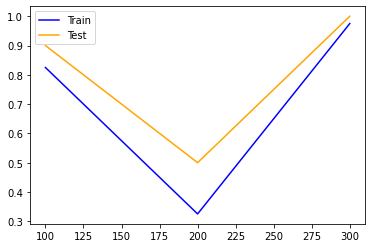%0A)

Let us check the loss for each model.

In \[12\]:

    loss_test = [loss_test1,loss_test2,loss_test3]
    print('Loss of test set for 100, 200 and 300 iterations ',loss_test)

    Loss of test set for 100, 200 and 300 iterations  [316.86322021484375, 6480.265625, 14056.537109375]

We observe that accuracy decreases and finally increases with
iterations. We also notice that the loss is increasing, and test
accuracy is higher than train accuracy. This behaviour could be because
training size is very small and the optimizers and augmentation used to
train a small set may be causing randomness. The weights maybe
oscillating in the beginning and reach the minima after more than 200
iterations, hence accuracy is low in between.

I have taken the following measures to get an optimal performance.

1.  Learning rate is set to be low to prevent overshooting.
2.  Data is augmented with flips and shifts to increase size of training
    set.
3.  Batch gradient descent is followed to increase samples per
    iteration, as training set is small.
4.  Adam optimization is used to make computation efficient.

We choose the model with 300 iterations finally with a test accuracy of
1.

In \[ \]: